# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 32

Group Members:
- Matthew Lim (18222005)
- Habib Akhmad Al Farisi (18222029)
- Winata Tristan (18222061)
- Ahmad Habibie Marjan (18222082)
- Satria Wisnu Wibowo (18222087)


## Import Libraries

In [5]:
import pandas as pd
import numpy as np

# Import other libraries if needed

## Import Dataset

In [6]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df = pd.read_csv('https://drive.google.com/uc?id=1U4GyI8BD21xL4-9y4uOOOYxPVO9zoMYf')
df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

## A. Drop Unnecessary Features

In [7]:

#Column yang didrop adala kolom yang memilih korelasi mendekati 0 atau 0 terhadap label dengan asumsi kolom ini memiliki behaviour sama dengan dataset tucil 2

# Dropping feature
columns_to_drop = ['FILENAME', 'Domain', 'URL', 'Title']
df_dropped_cols = df.drop(columns=columns_to_drop)

# Verify sudah didrop
print(df_dropped_cols.columns)

df_dropped_cols.head()

Index(['id', 'URLLength', 'DomainLength', 'IsDomainIP', 'TLD',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')


,id,URLLength,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,24.0,17.0,0.0,NaN,0.800000,NaN,NaN,NaN,2.0,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,2.0,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,35.0,28.0,0.0,au,0.857143,NaN,0.060894,NaN,2.0,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,31.0,NaN,NaN,com,0.562500,0.522907,0.055829,NaN,1.0,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,NaN,22.0,0.0,NaN,1.000000,NaN,NaN,NaN,1.0,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


## B. Split Training Set and Validation Set

In [8]:
from sklearn.model_selection import train_test_split

#Simpan original jika diperlukan nanti untuk traceback
train_data_ori = df_dropped_cols.copy()

#Split 80 train 20 validation
train_data, val_data = train_test_split(df_dropped_cols, test_size=0.2, random_state=42, stratify=df_dropped_cols['label'])

#Verify sudah displit

print(f'train_set: {train_data.shape}, val_set: {val_data.shape}')

train_set: (112323, 52), val_set: (28081, 52)


In [9]:
#Melihat distribusi label or traget

print("Class distribution pada training set:")
print(train_data['label'].value_counts())

print("Class distribution pada validation set:")
print(val_data['label'].value_counts())


#Lebih banyak 1 dari 0



Class distribution pada training set:
label
1    103880
0      8443
Name: count, dtype: int64
Class distribution pada validation set:
label
1    25970
0     2111
Name: count, dtype: int64


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [10]:
# Lihat persentasi daat hilang
missing_values = train_data.isnull().mean() * 100
print("Percentage of missing values per column:\n", missing_values)

Percentage of missing values per column:
 id                             0.000000
URLLength                     43.195071
DomainLength                  33.010158
IsDomainIP                    30.033920
TLD                           32.323745
CharContinuationRate          34.149729
TLDLegitimateProb             37.655689
URLCharProb                   37.083233
TLDLength                     33.970781
NoOfSubDomain                 31.226908
HasObfuscation                46.739314
NoOfObfuscatedChar            47.579748
ObfuscationRatio              45.832999
NoOfLettersInURL              45.112755
LetterRatioInURL              46.890664
NoOfDegitsInURL               41.860527
DegitRatioInURL               38.232597
NoOfEqualsInURL               43.815603
NoOfQMarkInURL                31.433455
NoOfAmpersandInURL            32.335319
NoOfOtherSpecialCharsInURL    33.871068
SpacialCharRatioInURL         44.695209
IsHTTPS                       35.208283
LineOfCode                    49.25082

In [11]:
# Pisahkan kkolom jadi numerical dan categorical (ini perlu gak sat?)
num_feat_train = train_data.select_dtypes(include=['int', 'float'])
cat_feat_train = train_data.select_dtypes(include=['object'])

num_feat_val = val_data.select_dtypes(include=['int', 'float'])
cat_feat_val = val_data.select_dtypes(include=['object'])

#### Feature Imputation - Mean & Most Frequent Imputation

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer


#Pipeline method untuk imputer
class FeatureImputer(BaseEstimator, TransformerMixin):
    #X parameter = data frame
    def fit(self, X, y=None):


        # Pisahkan numeric dan kategorikal
        self.num_columns = X.select_dtypes(include=['int', 'float']).columns
        self.cat_columns = X.select_dtypes(include=['object']).columns

        # Define input strategy, yaitu mean imputation for numerical
        self.num_imputer = SimpleImputer(strategy='mean')
        self.num_imputer.fit(X[self.num_columns])

        # Define input strategy, yaitu most frequent for categorical
        self.cat_imputer = SimpleImputer(strategy='most_frequent')
        self.cat_imputer.fit(X[self.cat_columns])

        return self

    def transform(self, X):

        # Jalankan learn parameter dari fit

        #Save original
        X_imputed = X.copy()

        # Impute numerical kolom
        X_imputed[self.num_columns] = self.num_imputer.transform(X_imputed[self.num_columns])

        # Impute categorical kolom
        X_imputed[self.cat_columns] = self.cat_imputer.transform(X_imputed[self.cat_columns])

        return X_imputed

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [13]:
# Cap nilai outlier menggunakan clipping lower and upper bound
def cap_outlier (data, numerical_columns):
  for col in numerical_columns:
      # hitung Q1 dan Q3
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)

      # Hitung IQR
      IQR = Q3 - Q1

      # Detyermine boundary dari data
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Cap value pada data
      data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

  return data

In [14]:
unique_values =train_data['label'].unique()
print(unique_values)

[1 0]


In [15]:
# Buang target feature dari numerical column
num_feat_train_filtered = [
    col for col in num_feat_train.columns.tolist()
    if not (train_data[col].nunique() == 2 and sorted(train_data[col].unique()) == [0, 1])
]

num_feat_val_filtered = [
    col for col in num_feat_val.columns.tolist()
    if not (val_data[col].nunique() == 2 and sorted(val_data[col].unique()) == [0, 1])
]

# Apply outlier capping
train_data_capped = cap_outlier(train_data, num_feat_train_filtered)
val_data_capped = cap_outlier(val_data, num_feat_val_filtered)


In [16]:
unique_values =train_data_capped['label'].unique()
print(unique_values)

[1 0]


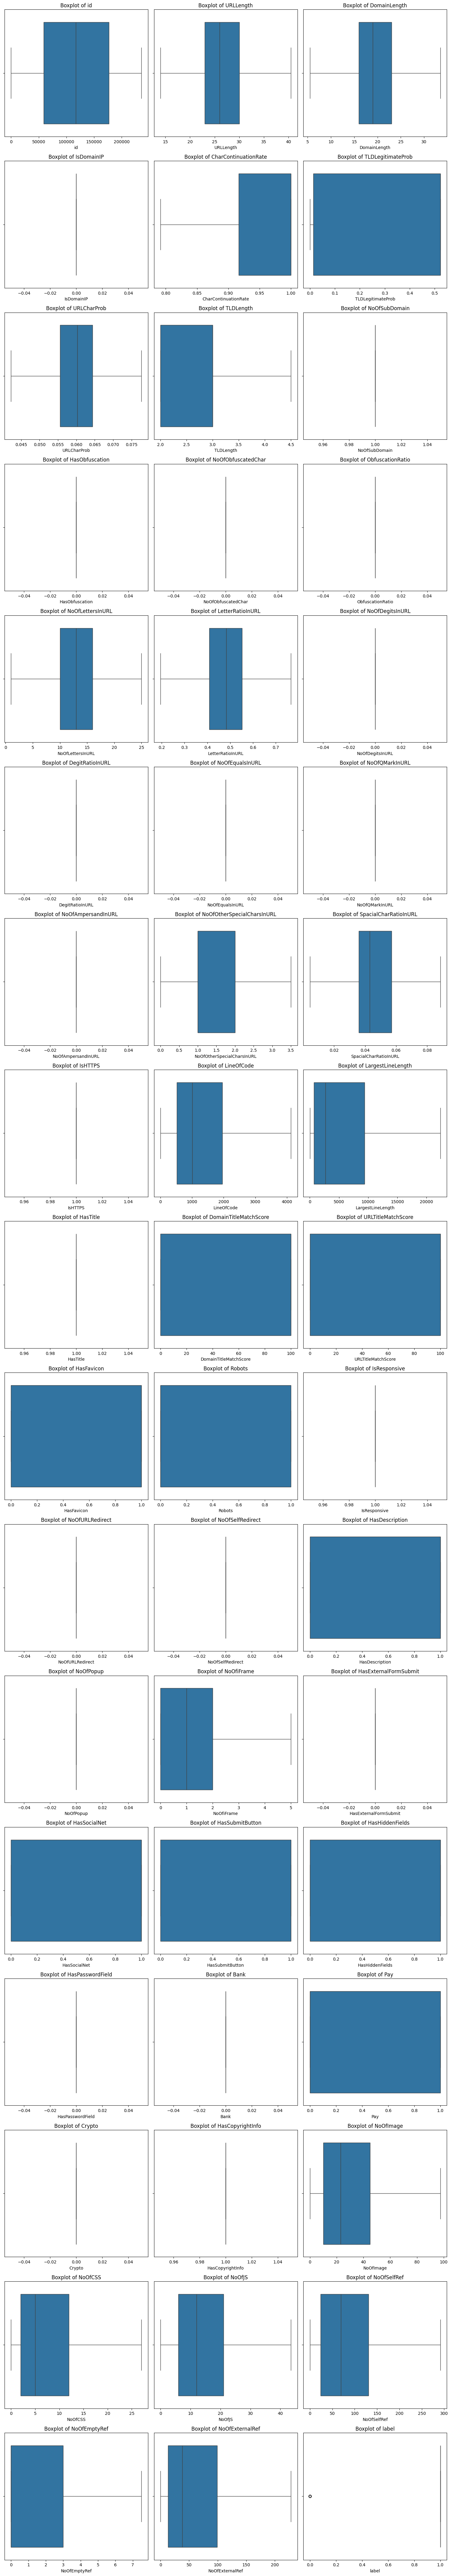

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots untuk each numerical column
numerical_columns = train_data_capped.select_dtypes(include=[np.number]).columns.tolist()

# Calculate jumlah feature dan instance untuk grid based
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + int(len(numerical_columns) % n_cols > 0)

# Buat dynamic subplot
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=train_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [18]:
#Drop duplicate pada train dan val
train_data_rem_dup = train_data_capped.drop_duplicates()
val_data_rem_dup = val_data_capped.drop_duplicates()

print(f'train_set: {train_data_rem_dup.shape}, val_set: {val_data_rem_dup.shape}')

train_set: (112323, 52), val_set: (28081, 52)


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

#### Feature Selection

In [19]:
#10 most frequent nilai tld
n_tld = 10
most_freq_tld = train_data['TLD'].value_counts()[:n_tld].index
print(train_data['TLD'].value_counts()[:n_tld])
print(most_freq_tld)
unique_tlds = train_data['TLD'].nunique()
print(f"Total unique TLDs: {unique_tlds}")

#Recategorize tld untuk menganalisis nilai tld
def recategorize_tld(tld):
    if tld in most_freq_tld:
        return tld
    else:
        return 'Others'

TLD
com    38309
org     8750
uk      3190
net     2236
de      1753
au      1354
jp      1022
edu     1006
it       899
nl       824
Name: count, dtype: int64
Index(['com', 'org', 'uk', 'net', 'de', 'au', 'jp', 'edu', 'it', 'nl'], dtype='object', name='TLD')
Total unique TLDs: 469


TLD mempunyai high cardinality yang dapat mengurangi efisiensi memori dan model mempelajari pattern yang terlalu spesifik

#### Feature Creation

In [20]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin


#Pipeline method feature creator
class FeatureCreator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Apply recategorization function pada 'TLD' columns
        X_transformed['TLD'] = X_transformed['TLD'].apply(recategorize_tld)

        # Derived features
        X_transformed['URL_to_Domain_Length_Ratio'] = X_transformed['URLLength'] / X_transformed['DomainLength']
        X_transformed['Letters_to_URLLength_Ratio'] = X_transformed['NoOfLettersInURL'] / X_transformed['URLLength']
        X_transformed['Digits_to_URLLength_Ratio'] = X_transformed['NoOfDegitsInURL'] / X_transformed['URLLength']
        X_transformed['SpecialChar_to_URLLength_Ratio'] = X_transformed['SpacialCharRatioInURL'] / X_transformed['URLLength']

        # Binary features
        X_transformed['HasRedirects'] = X_transformed['NoOfURLRedirect'] > 0
        X_transformed['HasPopup'] = X_transformed['NoOfPopup'] > 0
        X_transformed['HasExternalReferences'] = X_transformed['NoOfExternalRef'] > 0

        # Combined features
        X_transformed['ObfuscationIndicator'] = X_transformed['HasObfuscation'] * X_transformed['ObfuscationRatio']
        X_transformed['SecurityFeatureScore'] = (
            X_transformed['IsHTTPS'] * 1.5 +
            X_transformed['HasPasswordField'] +
            X_transformed['HasSubmitButton']
        )

        return X_transformed

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [21]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Write your code here

#Pipeline method scaling
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, method="standard"):

        self.method = method
        self.scaler = None

    def fit(self, X, y=None):

        if self.method == "minmax":
            self.scaler = MinMaxScaler()
        elif self.method == "standard":
            self.scaler = StandardScaler()
        elif self.method == "robust":
            self.scaler = RobustScaler()
        else:
            raise ValueError("Method invalid ! Pilih  'minmax', 'standard', or 'robust'.")

        self.scaler.fit(X)
        return self

    def transform(self, X):

        X_scaled = pd.DataFrame(
            self.scaler.transform(X),
            columns=X.columns,
            index=X.index
        )
        return X_scaled

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [23]:
# Create custom encoder class

#Pipeline method encoding
class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_encoded = X.copy()

        #list of object (categorical) cols
        cat_cols = X_encoded.select_dtypes(include=['object']).columns
        cat_cols = [col for col in cat_cols if col != 'id']  # Exclude 'id'

        # One-hot encode all categorical cols
        for col in cat_cols:
            X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix=col)], axis=1)
            X_encoded.drop(col, axis=1, inplace=True)  # Drop original column

        return X_encoded

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [24]:
from imblearn.over_sampling import SMOTE


#Balancing
def balance_classes(X_t, y_t):

    #smote
    sm = SMOTE(random_state=42)



    X_t_res, y_t_res = sm.fit_resample(X_t, y_t)


    return X_t_res, y_t_res


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [25]:
from sklearn.pipeline import Pipeline

#Define pipeline dan methodnya

pipe = Pipeline([("imputer", FeatureImputer()),
                 ("featurecreator", FeatureCreator()),
                 ("encoder", FeatureEncoder()),
                 ("scaler", FeatureScaler())])

In [26]:
# Coba fitting dan transform sebelum submission
train_set = pipe.fit_transform(train_data_rem_dup)

# val
val_set = pipe.transform(val_data_rem_dup)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


or create your own here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [27]:
from re import X
import numpy as np
from collections import Counter



#Model KNN


def euclidean(x1,x2):

  distance = np.sqrt(sum((x1 - x2) ** 2))

  return distance

def manhattan(x1,x2):

  return np.sum(np.abs(x1 - x2))

def minkowski(x1, x2, p=3):

    distances = np.sum(np.abs(x1 - x2) ** p, axis=1) ** (1 / p)
    return distances

class KNearestNeighbor:

    def __init__(self, distance_metrik, k= 3):
      self.distance_metrik = distance_metrik.lower()
      self.k = k

    def fit(self, X_train,  Y_train):


        self.X_train = np.array(X_train, dtype=float)
        self.Y_train = np.array(Y_train)

    def predict(self, X_val):
      self.X_val = np.array(X_val, dtype=float)
      predictions = [self._distance_individual(x) for x in self.X_val]
      return predictions

    def _distance_individual(self, x):

      #hitung jarak
      if(self.distance_metrik == "euclidean"):

        distances = [euclidean(x, x_train) for x_train in self.X_train]

      else:
        print("Invalid distance metric")
        raise ValueError("Invalid distance metric")

      # get k terdekat
      k_indices = np.argsort(distances)[:self.k]
      k_nearest_labels = [self.Y_train[i] for i in k_indices]

      # majority voting
      most_common = Counter(k_nearest_labels).most_common()
      return most_common[0][0]



## B. Naive Bayes

In [28]:
class NaiveBayes:
    def __init__(self, smoothing=1.0): # untuk cegah probabilitas 0
        self.smoothing = smoothing
        self.class_priors = {}
        self.feature_params = {}
        self.classes = None

    def calculate_mean_std(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        min_std = 1e-6
        std[std < min_std] = min_std
        return mean, std

    def gaussian_probability(self, x, mean, std):
        exponent = np.clip(-0.5 * ((x - mean) / std) ** 2, -500, 500)
        log_coef = -np.log(std) - 0.5 * np.log(2 * np.pi)
        return np.exp(log_coef + exponent)

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y)
        self.classes = np.unique(y)
        n_samples = len(y)

        for i in self.classes:
            class_mask = (y == i)
            class_samples = X[class_mask]
            self.class_priors[i] = (len(class_samples) + self.smoothing) / (n_samples + self.smoothing * len(self.classes))
            mean, std = self.calculate_mean_std(class_samples)
            self.feature_params[i] = {'mean': mean, 'std': std}

    def predict_proba(self, X):
        X = np.array(X, dtype=float)
        n_samples = len(X)
        probas = np.zeros((n_samples, len(self.classes)))

        for i, x in enumerate(X):
            class_probs = []
            for j, c in enumerate(self.classes):
                log_prob = np.log(self.class_priors[c])
                mean = self.feature_params[c]['mean']
                std = self.feature_params[c]['std']
                feature_probs = self.gaussian_probability(x, mean, std)
                log_prob += np.sum(np.log(feature_probs + 1e-10))
                probas[i, j] = log_prob
            max_log_prob = np.max(probas[i])
            probas[i] = np.exp(probas[i] - max_log_prob)
            probas[i] /= np.sum(probas[i])

        return probas

    def predict(self, X):
        probas = self.predict_proba(X)
        return self.classes[np.argmax(probas, axis=1)]

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [29]:
# Type your code here

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [30]:


from sklearn.metrics import accuracy_score

#Overall flow
#1. Pisah train data menjadi X dan Y dimana Y adalah jawaban atau target dan X adalah soal yang perlu dijawab dan  Recreate pipeline untuk consistency
#2. Lakukan fit dan transform pada X agar siap untuk learning
#3. Balancing train untuk menghindari bias dengan SMOTE
#4. Sebelum lanjut cek dlu data sudah ditransform sepenuhnya
#5. Lakukan step 1 dan 2 pada val data set juga tapi tidak difit transform saja karena kita mau program menggunakan apa yang dipelajari pada train
#6. Data siap untuk training model, kita fit ke model untuk soal dan jawabannya, yakni X dan Y transformed & balanced
#7. Sehabis training, model siap untuk prediksi, lakukan prediksi dengan X validation
#8. Terakhir cek akurasi dengan mengkopare jawaban model dengan Y val atau kunci jawaban

# Step 1: Pisah train data menjadi X dan Y dimana Y adalah jawaban atau target dan X adalah soal yang perlu dijawab dan  Recreate pipeline untuk consistency
X_train = train_data_rem_dup.drop(columns=['id', 'label'])
y_train = train_data_rem_dup['label']

submission_pipe = Pipeline([
    ("imputer", FeatureImputer()),
    ("featurecreator", FeatureCreator()),
    ("encoder", FeatureEncoder()),  # Ensure the same order
    ("scaler", FeatureScaler()),
])

## Submission KNN Bukan Pustaka

In [ ]:
#Step 2: Lakukan fit dan transform pada X agar siap untuk learning
X_train_transformed = submission_pipe.fit_transform(X_train)

# Step 3: Balancing train untuk menghindari bias
X_train_balanced, y_train_balanced = balance_classes(X_train_transformed, y_train)

# Step 4: Sebelum lanjut cek dlu data sudah ditransform sepenuhnya
object_columns = X_train_balanced.select_dtypes(include=['object']).columns
if object_columns.any():
    print(f"Unexpected object columns found in training data: {object_columns}")
    raise ValueError("Ensure all features are numeric before training.")

# Step 5: Lakukan step 1 dan 2 pada val data set juga tapi tidak difit, transform saja karena kita mau program menggunakan apa yang dipelajari pada train
X_val = val_data_rem_dup.drop(columns=['id', 'label'])
y_val = val_data_rem_dup['label']
X_val_transformed = submission_pipe.transform(X_val)



# Step 6: Data siap untuk training model, kita fit ke model untuk soal dan jawabannya, yakni X dan Y transformed & balanced


knn_model = KNearestNeighbor("euclidean", k=3)
knn_model.fit(X_train_balanced, y_train_balanced) #fit(self, X_train, Y_train, distance_type, max_k = None, num_of_k_values=10)

# Step 7: Sehabis training, model siap untuk prediksi, lakukan prediksi dengan X validation
val_predictions = knn_model.predict(X_val_transformed)

# Step 8: Terakhir cek akurasi dengan mengkompare jawaban model dengan Y val atau kunci jawaban serta buat submission dataframe
val_accuracy = accuracy_score(y_val, val_predictions)
print("")
print(f"Validation Accuracy: {val_accuracy:.4f}")
submission = val_data_rem_dup[['id', 'label']].copy()  # Keep the `id` and `label` columns
submission['predictions'] = val_predictions


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other method

## Submission Bayes Bukan Pustaka

In [32]:
#Step 2: Lakukan fit dan transform pada X agar siap untuk learning
X_train_transformed = submission_pipe.fit_transform(X_train)

# Step 3: Balancing train untuk menghindari bias
X_train_balanced, y_train_balanced = balance_classes(X_train_transformed, y_train)

# Step 4: Sebelum lanjut cek dlu data sudah ditransform sepenuhnya
object_columns = X_train_balanced.select_dtypes(include=['object']).columns
if object_columns.any():
    print(f"Unexpected object columns found in training data: {object_columns}")
    raise ValueError("Ensure all features are numeric before training.")

# Step 5: Lakukan step 2 pada val data set juga tapi tidak difit transform saja karena kita mau program menggunakan apa yang dipelajari pada train
X_val = val_data_rem_dup.drop(columns=['id', 'label'])
y_val = val_data_rem_dup['label']
X_val_transformed = submission_pipe.transform(X_val)

# Step 6: Data siap untuk training model, kita fit ke model untuk soal dan jawabannya, yakni X dan Y transformed & balanced
gnb = NaiveBayes(smoothing = 1.0)
gnb.fit(X_train_balanced, y_train_balanced)

# Step 7: Sehabis training, model siap untuk prediksi, lakukan prediksi dengan X validation
val_predictions = gnb.predict(X_val_transformed)

# Step 8: Terakhir cek akurasi dengan mengkompare jawaban model dengan Y val atau kunci jawaban serta buat submission dataframe
val_accuracy = accuracy_score(y_val, val_predictions)
print("")
print(f"Validation Accuracy: {val_accuracy:.4f}")
submission = val_data_rem_dup[['id', 'label']].copy()  # Keep the `id` and `label` columns
submission['predictions'] = val_predictions


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other method


Validation Accuracy: 0.6286


## Submission KNN Pustaka

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


#Step 2: Lakukan fit dan transform pada X agar siap untuk learning
X_train_transformed = submission_pipe.fit_transform(X_train)

# Step 3: Balancing train untuk menghindari bias
X_train_balanced, y_train_balanced = balance_classes(X_train_transformed, y_train)

# Step 4: Sebelum lanjut cek dlu data sudah ditransform sepenuhnya
object_columns = X_train_balanced.select_dtypes(include=['object']).columns
if object_columns.any():
    print(f"Unexpected object columns found in training data: {object_columns}")
    raise ValueError("Ensure all features are numeric before training.")

# Step 5: Lakukan step 1 dan 2 pada val data set juga tapi tidak difit, transform saja karena kita mau program menggunakan apa yang dipelajari pada train
X_val = val_data_rem_dup.drop(columns=['id', 'label'])
y_val = val_data_rem_dup['label']
X_val_transformed = submission_pipe.transform(X_val)

# Step 6: Data siap untuk training model, kita fit ke model untuk soal dan jawabannya, yakni X dan Y transformed & balanced
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_balanced, y_train_balanced)

# Step 7: Sehabis training, model siap untuk prediksi, lakukan prediksi dengan X validation
val_predictions = knn_model.predict(X_val_transformed)

# Step 8: Terakhir cek akurasi dengan mengkompare jawaban model dengan Y val atau kunci jawaban serta buat submission dataframe
val_accuracy = accuracy_score(y_val, val_predictions)
print("")
print(f"Validation Accuracy: {val_accuracy:.4f}")
submission = val_data_rem_dup[['id', 'label']].copy()  # Keep the `id` and `label` columns
submission['predictions'] = val_predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other method


Validation Accuracy: 0.9588


## Submission Bayes Pustaka

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Step 2: Lakukan fit dan transform pada X agar siap untuk learning
X_train_transformed = submission_pipe.fit_transform(X_train)

# Step 3: Balancing train untuk menghindari bias
X_train_balanced, y_train_balanced = balance_classes(X_train_transformed, y_train)

# Step 4: Sebelum lanjut cek dlu data sudah ditransform sepenuhnya
object_columns = X_train_balanced.select_dtypes(include=['object']).columns
if object_columns.any():
    print(f"Unexpected object columns found in training data: {object_columns}")
    raise ValueError("Ensure all features are numeric before training.")

# Step 5: Lakukan step 2 pada val data set juga tapi tidak difit transform saja karena kita mau program menggunakan apa yang dipelajari pada train
X_val = val_data_rem_dup.drop(columns=['id', 'label'])
y_val = val_data_rem_dup['label']
X_val_transformed = submission_pipe.transform(X_val)

# Step 6: Data siap untuk training model, kita fit ke model untuk soal dan jawabannya, yakni X dan Y transformed & balanced
gnb = GaussianNB()
gnb.fit(X_train_balanced, y_train_balanced)

# Step 7: Sehabis training, model siap untuk prediksi, lakukan prediksi dengan X validation
val_predictions = gnb.predict(X_val_transformed)

# Step 8: Terakhir cek akurasi dengan mengkompare jawaban model dengan Y val atau kunci jawaban serta buat submission dataframe
val_accuracy = accuracy_score(y_val, val_predictions)
print("")
print(f"Validation Accuracy: {val_accuracy:.4f}")
submission = val_data_rem_dup[['id', 'label']].copy()  # Keep the `id` and `label` columns
submission['predictions'] = val_predictions


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other method


Validation Accuracy: 0.7484


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`

Model tidak menunnjukan performa yang lebih baik daripada library, kemungkinan dari kurangnya optimisasi seprti perhitungan distance yang kurang baik, dan seterusnya.